## Gibbs采样在简单能量模型中的问题演示

以下将使用Python实现一个简单的基于能量的模型，包含两个二元变量 $a$ 和 $b$，取值为 $-1$ 或 $+1$。能量函数定义为：

$$
E(a, b) = -w \cdot a \cdot b
$$

其中，$w$ 是一个大的正数。这个模型表达了 $a$ 和 $b$ 具有相同符号的强烈偏好。

### Gibbs 采样过程

以下将使用 Gibbs 采样在该模型上生成样本，并展示当 $w$ 很大时，Gibbs 采样如何难以翻转变量的符号，从而导致混合不良。


## 模型解释

### 变量
- $a, b \in \{-1, +1\}$

### 能量函数
- $E(a, b) = -w \cdot a \cdot b$
- 当 $a$ 和 $b$ 符号相同时，能量较低，概率较高。
- 当 $a$ 和 $b$ 符号相反时，能量较高，概率较低。

### 目标
- 使用 Gibbs 采样从模型的联合分布 $p(a, b)$ 中采样，观察混合情况。


## 代码解释

### 函数定义

- **能量函数 `energy(a, b, w)`**：  
  计算给定 $a$ 和 $b$ 时的能量 $E(a, b) = -w \cdot a \cdot b$。

- **条件概率 `p_a_given_b(b, w)`**：  
  计算在给定 $b$ 的情况下 $a = +1$ 的概率：
  $$
  P(a=+1 \mid b) = \frac{1}{1 + \exp(-2wb)}
  $$

- **条件概率 `p_b_given_a(a, w)`**：  
  计算在给定 $a$ 的情况下 $b = +1$ 的概率：
  $$
  P(b=+1 \mid a) = \frac{1}{1 + \exp(-2wa)}
  $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义能量函数
def energy(a, b, w):
    return -w * a * b

# 定义条件概率（使用Gibbs采样）
def p_a_given_b(b, w):
    # 计算 P(a = 1 | b)
    prob = 1 / (1 + np.exp(-2 * w * b))
    return prob

def p_b_given_a(a, w):
    # 计算 P(b = 1 | a)
    prob = 1 / (1 + np.exp(-2 * w * a))
    return prob

### Gibbs 采样过程 `gibbs_sampling(w, num_samples, initial_state)`

1. **初始化**：设置初始状态 $(a, b)$。
2. **循环迭代**：
   - 给定 $b$，采样 $a$：
     - 计算 $P(a=+1 \mid b)$。
     - 根据概率决定 $a$ 的取值。
   - 给定 $a$，采样 $b$：
     - 计算 $P(b=+1 \mid a)$。
     - 根据概率决定 $b$ 的取值。
   - **保存样本**：将新的 $(a, b)$ 添加到样本列表中。
3. **返回**：所有采样得到的 $(a, b)$ 对。

In [2]:
# Gibbs采样过程
def gibbs_sampling(w, num_samples, initial_state):
    samples = []
    a, b = initial_state

    for _ in range(num_samples):
        # 给定 b，采样 a
        p_a = p_a_given_b(b, w)
        a = 1 if np.random.rand() < p_a else -1

        # 给定 a，采样 b
        p_b = p_b_given_a(a, w)
        b = 1 if np.random.rand() < p_b else -1

        samples.append((a, b))

    return samples

### 参数设置

- **权重 $w$**：  
  选择较大的值（例如 5、10、20）可以增强 $a$ 和 $b$ 之间的相关性，观察 Gibbs 采样的混合问题。

- **样本数量 `num_samples`**：  
  设置为 1000 次迭代。

- **初始状态 `initial_state`**：  
  任意选择一个初始 $(a, b)$ 值。

In [3]:
# 参数设置
w = 5  # 可以尝试更大的值，例如10、20，观察效果
num_samples = 1000
initial_state = (1, -1)  # 初始状态，随意设置

### 运行采样并绘制结果

- **提取 $a$ 和 $b$ 的序列**：  
  从采样结果中分别获取 $a$ 和 $b$ 的取值列表。

- **绘制 $a$ 和 $b$ 的取值变化**：  
  展示在迭代过程中，$a$ 和 $b$ 如何变化。
  通过图形观察变量是否发生翻转，以及翻转的频率。

- **统计取值次数**：  
  使用 `Counter` 统计 $a$ 和 $b$ 取 $+1$ 和 $-1$ 的次数。

In [4]:
# 运行Gibbs采样
samples = gibbs_sampling(w, num_samples, initial_state)

# 提取 a 和 b 的序列
a_samples = [sample[0] for sample in samples]
b_samples = [sample[1] for sample in samples]


### 结果分析

- **变量取值变化图**：  
  当 $w$ 较大时，图中可以看到 $a$ 和 $b$ 大部分时间保持在同一个值（例如 $+1$ 或 $-1$），很少发生翻转。这表明  
   Gibbs 采样在高相关性的情况下，变量的状态难以改变，导致混合不良。

- **取值次数统计**：  
  计数结果可能显示 $a$ 和 $b$ 在某个值上停留的次数远多于另一个值。例如，当 $w=5$ 时，可能出现 $a$ 和 $b$   
  为 $+1$ 的次数远多于 $-1$ 的次数。

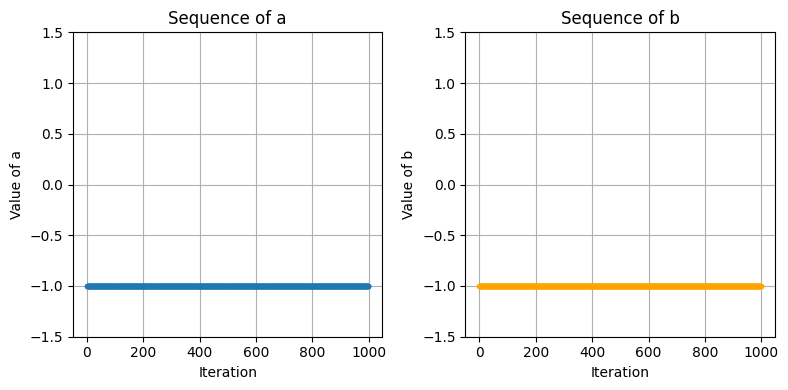

In [7]:
# 绘制结果
plt.figure(figsize=(8, 4))

# 子图1：a 的取值变化
plt.subplot(1, 2, 1)
plt.plot(a_samples, '-o', markersize=3)
plt.title('Sequence of a')
plt.xlabel('Iteration')
plt.ylabel('Value of a')
plt.ylim([-1.5, 1.5])
plt.grid(True)

# 子图2：b 的取值变化
plt.subplot(1, 2, 2)
plt.plot(b_samples, '-o', markersize=3, color='orange')
plt.title('Sequence of b')
plt.xlabel('Iteration')
plt.ylabel('Value of b')
plt.ylim([-1.5, 1.5])
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# 统计 a 和 b 的取值次数
from collections import Counter
a_counts = Counter(a_samples)
b_counts = Counter(b_samples)

print(f"Counts of a: {a_counts}")
print(f"Counts of b: {b_counts}")

Counts of a: Counter({-1: 1000})
Counts of b: Counter({-1: 1000})


### 不同 $w$ 值的影响

- **$w$ 较小（例如 $w=0.5$）**：  
  $a$ 和 $b$ 更频繁地翻转，Gibbs 采样混合较好。

- **$w$ 较大（例如 $w=10$）**：  
  $a$ 和 $b$ 很少翻转，长时间停留在同一状态，混合效果差。


### 结论

通过上述简单的例子，我们展示了 Gibbs 采样在处理高度相关的变量时可能遇到的混合问题：

- 当变量之间具有强烈的相互依赖关系（由大的 $w$ 引起）时，Gibbs 采样可能会在某个模式上停留过久，难以有效地  
探索状态空间。这与混合不良问题一致，即马尔可夫链在高概率模式之间的转换可能非常缓慢。

### 解决思路

1. **降低相关性**：减小 $w$ 的值，使变量之间的依赖性减弱，提高混合效率。
2. **使用其他采样方法**：如 Metropolis-Hastings 算法，可能在某些情况下比 Gibbs 采样表现更好。
3. **块采样**：同时更新相关的变量（即同时更新 $a$ 和 $b$），但在高维情况下可能不可行。
